## Sentiment analysis using Afinn Lexicon


In [1]:
import pandas as pd

news_df = pd.read_csv("news.csv")

# initialize afinn sentiment analyzer
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in news_df['Article']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['NewsType']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                \
                        count       mean        std   min   25%  50%    75%   
news_category                                                                 
business                920.0   6.269565  16.463074 -72.0 -3.00  4.0  12.25   
sports                 1408.0  10.089489  17.100288 -73.0  0.00  7.0  18.00   
world                   364.0  10.431319  17.912343 -60.0  1.75  8.0  17.00   

                     
                max  
news_category        
business       88.0  
sports         91.0  
world          84.0

### Plotting the predictions

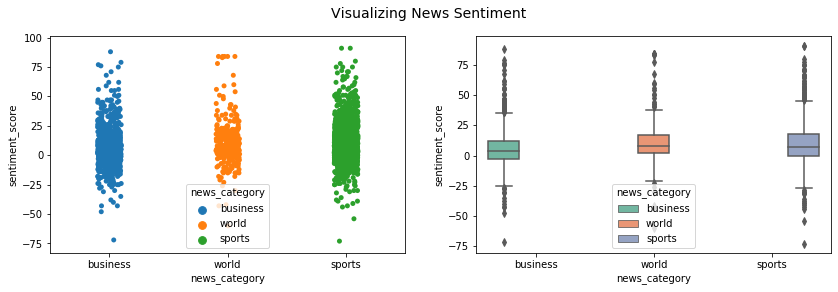

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score", 
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", 
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)